# Members <a name="members"></a>

 - *Jia Ma, 013758901* 
 - *Laura Ying Liu, 011462867* 
 - *Kevin Lai, 008498282*

# Table of Contents
1. [Members](#members)
2. [Project Title](#title)
3. [Business Objective](#objective)
4. [Background](#background)
5. [Colab team drive setup](#colab)
6. [Introduce our primary dataset: US wildfire from 1992 to 2015](#wildfire)
> 6.1.[key features](#features). 
<br>
> 6.2.[data cleaning](#cleaning).
<br>
> 6.3.[convert date column from Julian to Gregorian](#dateformat).
<br>
> 6.4.[convert fire cause column from categorical to numerical](#causeformat).
<br>
> 6.5.[separate date column into 3 columns: year, month, day](#datecolumn).
<br>
> 6.6.[data visulizaton on "fire cause" feature](#firecause).
<br>
> 6.7.[data visulizaton on "year" feature](#fireyear).
<br>
> 6.8.[data visulizaton on "month" feature](#firemonth).
<br>
> 6.9.[statistics on "fire size" feature](#firesize).
<br>
> 6.10.[statistics on "discovery time" feature](#discoverytime).
<br>
> 6.11.[data visulization on "fire size" and "year"](#firesizeyear).
<br>
> 6.12.[data visulization on "fire size" and "month"](#firesizemonth).
<br>
> 6.13.[data visulization on "fire size" and "state"](#firesizestate).
<br>
7. [K-means](#kmeans)
> 7.1.[3 clusters for "fire size" and "year"](#firesize3).
<br>
> 7.2.[3 clusters for "fire size" and "state"](#firesizestate3).
<br>
> 7.3.[3 clusters for "fire size" and "fire cause"](#firesizecause3).
<br>
> 7.4.[2 clusters for "fire size" and "discovery time"](#firesizetime2).
<br>
8. [GMM](#GMM)
> 8.1. [GMM 3 clusters for "fire size" and "year"](#GMM)
<br>
> 8.2. [GMM with full covariance type](#GMMfull)
9. [Linear Regression](#linearregression)
> 9.1. [calculate correlation coefficients among features](#correlation)
<br>
> 9.2. [define x-array and y-array](#xyarray)
<br>
> 9.3. [separate training data from testing data](#trainingtest)
<br>
> 9.4. [apply linear regression model to training data](#trainingdata)
<br>
> 9.5. [predict y in test data, and compare results with actual y in test data](#predicttest)
<br>
> 9.6. [data visulization for linear regression result](#lrgraph)
<br>
> 9.7. [accuracy score on the testing data](#testscore)
<br>
> 9.8. [accuracy score on the training data](#trainscore)
10. [5-fold Cross Validation](#crossvalidation)
11. [Introduce Global land temperature dataset](#weatherdata)
12. [Introduce weather-by-country&state dataset](#weatherbycountry)
13. [Introduce 2013 Weather dataset from URL](#2013weatherdata)
14. [Join the four datasets above, exact California datapoints and compare linear regression](#joindata)
15. [Desicion Tree](#decisiontree)
16. [Logistic Regression](#logisticregression)
17. [Random Forrest](#fandomforrest)
18. [Naive Bayes](#naivebayes)
19. [Adaboost](#adaboost)
20. [Beatiful Soup](#beatifulsoup)
21. [Data Enrichment with Max Temp, Min Temp,Preciption](#dataenrichment)

| Accuracy Score | Single Dataset | Enriched Dataset |
| --- | --- | --- |
| Decision Tree | 61.8% | 61.2% |
| Logistic Regression | 31.3% | 49% |
| Random Forest | 69.5% | 66.9% |
| Naive Bayes | 46.5% | 47.4% |
| Adaboost | 53.6% |53.2% |
| Linear Regression | <1% |10% |
---

# CMPE 257 Machine Learning Project (US Wildfire)<a name="title"></a>

# Business Objective<a name="objective"></a>

Our objective is to determine the primary leading factors that cause wildfires.

# Background<a name="background"></a>

According to the US deparment of Homeland Security, "**a wildfire is an unplanned fire that burns in a natural area such as a forest, grassland, or prarie**" [(Homeland Security)](https://www.ready.gov/wildfires). Wildfires are environmental hazard that can cause significant damages to both humans and the environment. Large wildfires can destroy hundreds to thousands of homes and can cause severe to life-threating injuries or even death to many people and animals.

# Colab Team Drive Setup<a name="colab"></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Our first dataset: US Wildfire from 1997 to 2015<a name="wildfire"></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We took **US Wildfire dataset from Kaggle** and extracted the data that seemed the most relevant to our topic into a CSV file. Then, we loaded the CSV file and previewed some of the data as shown below.

https://www.kaggle.com/rtatman/188-million-us-wildfires/home

In [0]:
df = pd.read_csv("/content/drive/Team Drives/257Machinelearning/Fires.csv",sep='\t')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


The following shows the list of attributes in the **"Fires"** table:

In [0]:
print(list(df.head(0)))

['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Shape']


<a name="features"></a>
Based on all of the attributes found in the FIRES table, the attributes that appear to be the most relevant to our topic are the following:
- time **(FIRE_YEAR, DISCOVERY_DATE, DISCOVERY_TIME)**,
- location **(LATITUDE, LONGITUDE, STATE)**,
- cause of the fire **(STAT_CAUSE_DESCR)**
- size of the fire **(FIRE_SIZE)**

In [0]:
df = df[["FIRE_YEAR","STAT_CAUSE_DESCR","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE","DISCOVERY_TIME","FIRE_SIZE"]]
df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,1300.0,0.10
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,845.0,0.25
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,1921.0,0.10
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,1600.0,0.10
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,1600.0,0.10


<a name="cleaning"></a>
__Remove rows with empty data points__

In [0]:
df.isna().sum()

FIRE_YEAR                0
STAT_CAUSE_DESCR         0
LATITUDE                 0
LONGITUDE                0
STATE                    0
DISCOVERY_DATE           0
DISCOVERY_TIME      882638
FIRE_SIZE                0
dtype: int64

In [0]:
#df = df.dropna()
df['DISCOVERY_TIME'] = df['DISCOVERY_TIME'].fillna(-500)

In [0]:
df.isna().sum()

FIRE_YEAR           0
STAT_CAUSE_DESCR    0
LATITUDE            0
LONGITUDE           0
STATE               0
DISCOVERY_DATE      0
DISCOVERY_TIME      0
FIRE_SIZE           0
dtype: int64

<a name="dateformat"></a>
According to the Kaggle page for this dataset, the DISCOVERY_DATE field is in __Julian Date__ format, so we should convert it to __Gregorian Date__ format since that is what most people are used to.

In [0]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(df.head()) 

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   DISCOVERY_TIME  FIRE_SIZE       DATE  
0          1300.0       0.10 2005-02-02  
1           845.0       0.25 2004-05-12  
2          1921.0       0.10 2004-05-31  
3          1600.0       0.10 2004-06-28  
4          1600.0       0.10 2004-06-28  


<a name="causeformat"></a>
__Convert "Fire Cause" column from categorial data style to numerical data type__

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR_TRANS'] = le.fit_transform(df['STAT_CAUSE_DESCR'])

__Display what each number means after above conversion for interpretation.__

In [0]:
for i in df['STAT_CAUSE_DESCR_TRANS'].unique():
    print(str(i)+" is reperesenting "+df[df['STAT_CAUSE_DESCR_TRANS']==i]['STAT_CAUSE_DESCR'].unique())

['7 is reperesenting Miscellaneous']
['6 is reperesenting Lightning']
['3 is reperesenting Debris Burning']
['1 is reperesenting Campfire']
['4 is reperesenting Equipment Use']
['0 is reperesenting Arson']
['2 is reperesenting Children']
['10 is reperesenting Railroad']
['11 is reperesenting Smoking']
['9 is reperesenting Powerline']
['12 is reperesenting Structure']
['5 is reperesenting Fireworks']
['8 is reperesenting Missing/Undefined']


<a name="datecolumn"></a>
__Place Year/Month/Day into separate columns for further analysis__

In [0]:
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday_name
df_orig = df.copy() 
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   DISCOVERY_TIME  FIRE_SIZE       DATE  STAT_CAUSE_DESCR_TRANS  YEAR  MONTH  \
0          1300.0       0.10 2005-02-02                       7  2005      2   
1           845.0       0.25 2004-05-12                       6  2004      5   
2          1921.0       0.10 2004-05-31                       3  2004      5   
3          1600.0       0.10 2004-06-28                       6  2004      6   
4          1600.0       0.10 2004-06-28                       6  2004      6   

  DAY_OF_WEEK  
0   Wednesday  
1   Wednesday  
2 

<a name="firecause"></a>
__Plot on fire cause column. We can see that debris burning is a major fire cause__

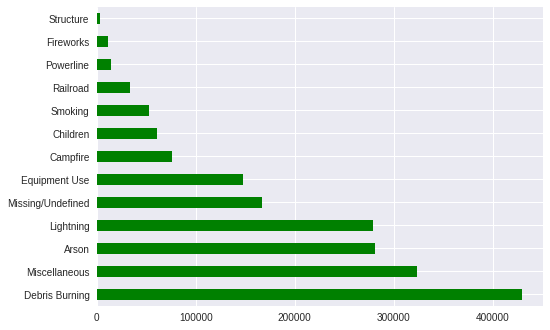

In [0]:
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='green')
plt.show()

<a name="fireyear"></a>
__As the graph shows, year 2006 has the most fire cases.__

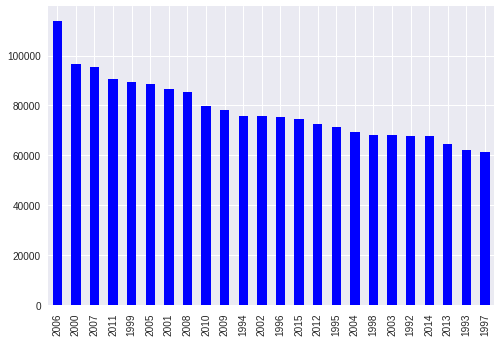

In [0]:
df['YEAR'].value_counts().plot(kind='bar',color='blue')
plt.show()

<a name="firemonth"></a>
__Wildfires usually take place in spring and summer__

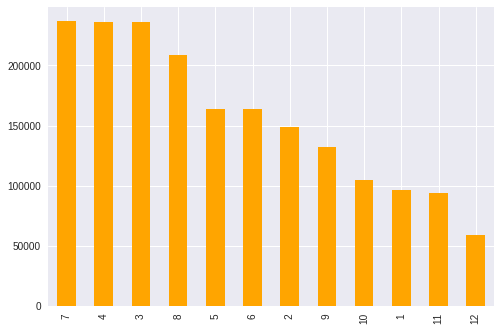

In [0]:
df['MONTH'].value_counts().plot(kind='bar',color='ORANGE')
plt.show()

<a name="firesize"></a>
__Let's see the distribution of fire size. Most of the fires are below 3.3 acres and the largest fire size is 606945 acres! __

In [0]:
df['FIRE_SIZE'].describe()

count    1.880465e+06
mean     7.452016e+01
std      2.497598e+03
min      1.000000e-05
25%      1.000000e-01
50%      1.000000e+00
75%      3.300000e+00
max      6.069450e+05
Name: FIRE_SIZE, dtype: float64

<a name="discoverytime"></a>
__The discovery time is show in *hhmm* format where *hh* refers to hours and *mm* refers to minutes.__

In [0]:
df['DISCOVERY_TIME'].describe()

count    1.880465e+06
mean     5.363237e+02
std      1.018547e+03
min     -5.000000e+02
25%     -5.000000e+02
50%      8.000000e+02
75%      1.505000e+03
max      2.359000e+03
Name: DISCOVERY_TIME, dtype: float64

<a name="firesizeyear"></a>
__Let's see when large fire happens. it's very interesting that we have more large fires than the past years.__

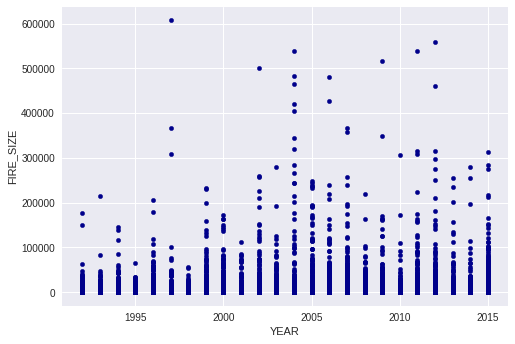

In [0]:
ax1 = df.plot.scatter(x='YEAR',y='FIRE_SIZE',c='DarkBlue')

<a name="firesizemonth"></a>
__Larger fires usually occur in summer__

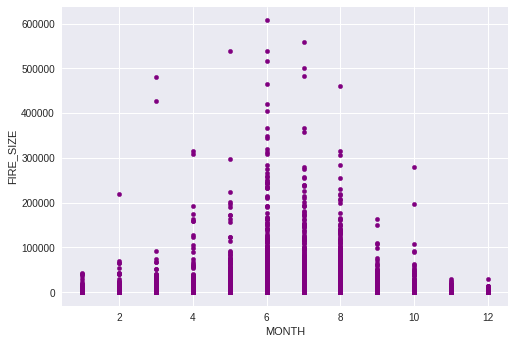

In [0]:
ax2 = df.plot.scatter(x='MONTH',y='FIRE_SIZE',c='PURPLE')

<a name="firesizestate"></a>
__Let's see which states are more likely to have large fires__

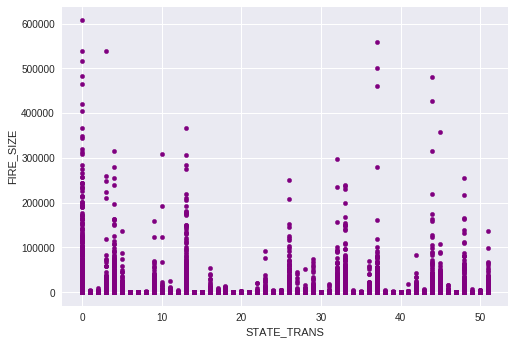

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STATE_TRANS'] = le.fit_transform(df['STATE'])
ax3 = df.plot.scatter(x='STATE_TRANS',y='FIRE_SIZE',c='PURPLE')

__States encoding maps relationship__

In [0]:
for i in df['STATE_TRANS'].unique():
    print(str(i)+" is reperesenting "+df[df['STATE_TRANS']==i]['STATE'].unique())

['4 is reperesenting CA']
['32 is reperesenting NM']
['37 is reperesenting OR']
['27 is reperesenting NC']
['51 is reperesenting WY']
['5 is reperesenting CO']
['48 is reperesenting WA']
['26 is reperesenting MT']
['45 is reperesenting UT']
['3 is reperesenting AZ']
['42 is reperesenting SD']
['2 is reperesenting AR']
['33 is reperesenting NV']
['13 is reperesenting ID']
['23 is reperesenting MN']
['44 is reperesenting TX']
['9 is reperesenting FL']
['41 is reperesenting SC']
['18 is reperesenting LA']
['36 is reperesenting OK']
['16 is reperesenting KS']
['24 is reperesenting MO']
['29 is reperesenting NE']
['22 is reperesenting MI']
['17 is reperesenting KY']
['35 is reperesenting OH']
['15 is reperesenting IN']
['46 is reperesenting VA']
['14 is reperesenting IL']
['43 is reperesenting TN']
['10 is reperesenting GA']
['0 is reperesenting AK']
['28 is reperesenting ND']
['50 is reperesenting WV']
['49 is reperesenting WI']
['1 is reperesenting AL']
['30 is reperesenting NH']
['38 is 

# <FONT color=blue>US Wildfires Dataset for K Mean<FONT><a name="kmeans"></a>

<a name="firesize3"></a>
__After plotting all these data, it seems wildfire occurs every year. However why has the fire size become larger in the recent 15 years? We found some interesting features like fire size and year, so we can cluster these features to see which years have larger fires, so we can further investigate what happened during these years__





In [0]:
from sklearn.cluster import KMeans

In [0]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

**Elbow Method to determine K in K-means clustering**

In [0]:
mms = MinMaxScaler()
mms.fit(df[['YEAR','FIRE_SIZE']])
data_transformed = mms.transform(df[['YEAR','FIRE_SIZE']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

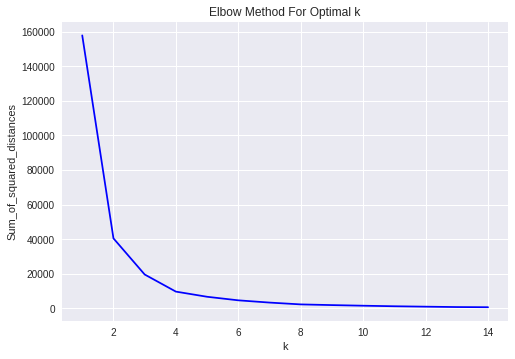

In [0]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

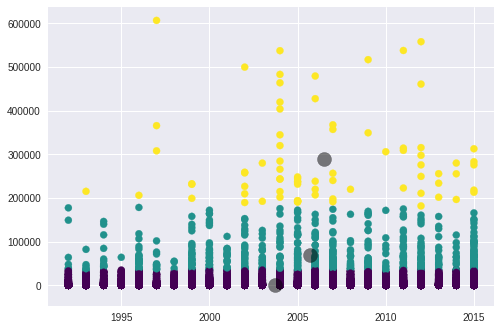

In [0]:
X1=df[['YEAR','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X1)
y_kmeans = kmeans.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

__From K-means, we can see that 2007 has the largest fire size, and 2004 has the most number of large fire size cases. We can analyze further based on the current results. We will import some weather data to compare with the fire data to see whether we have any findings.__

<a name="firesizestate3"></a>
__K means to see fire size associated with US States. This graph generates 3 clusters__

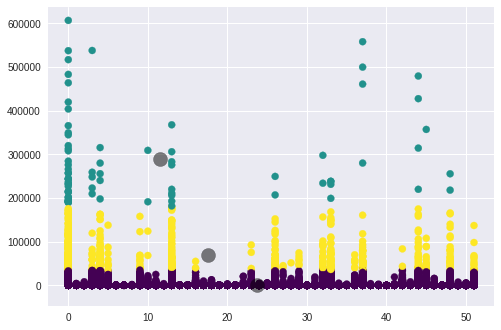

In [0]:
X2=df[['STATE_TRANS','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X2)
y_kmeans = kmeans.predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<a name="firesizecause3"></a>
__K means to see patterns between fire size and cause of the fire. Conclusion is that the #6 cause, which represents Lightning, is associated with the largest fire size.__

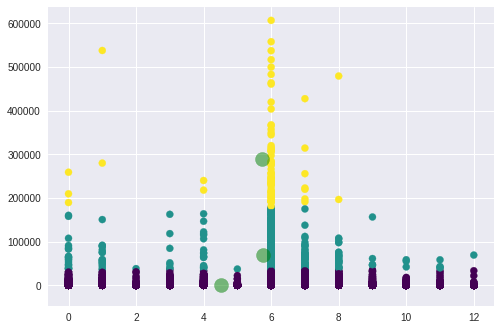

In [0]:
X3=df[['STAT_CAUSE_DESCR_TRANS','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X3)
y_kmeans = kmeans.predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5)

<a name="firesizetime2"></a>
__K-means to see relationship between discovery time and size of the fire. According to below k-means graph, size of fires appears to be much larger between 1000, or (10:00 AM), and 2000, or (8:00 PM). __

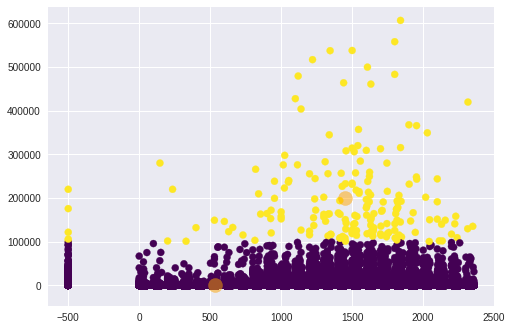

In [0]:
X4=df[['DISCOVERY_TIME','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=2, random_state=0).fit(X4)
y_kmeans = kmeans.predict(X4)
plt.scatter(X4[:, 0], X4[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)

<a name="GMM"></a>
# <FONT color=blue>US Wildfires Dataset for GMM<FONT>

__Let's compare Kmean with GMM. We will apply GMM on YEAR and Fire Size__

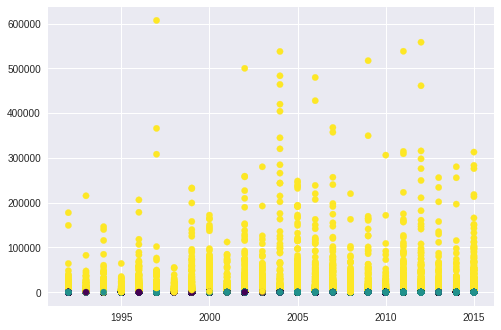

In [0]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X1)
labels = gmm.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=40, cmap='viridis')

<a name="GMMfull"></a>
__Change to different covaricance type to see if there is any difference. Compared with K means method, with same number of clustering size(3 clusters), kmean is better at differentiating fire size into small, medium and large.__

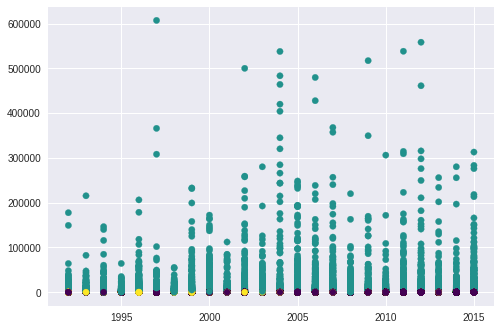

In [0]:
gmm_full = GaussianMixture(n_components=3,covariance_type='full').fit(X1)
labels_full = gmm_full.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels_full, s=40, cmap='viridis')

<a name="linearregression"></a>
# <FONT color=blue>US Wildfires Dataset: Linear Regression<FONT>

In [0]:
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

**Histogram to show one single feature "Fire Size".**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


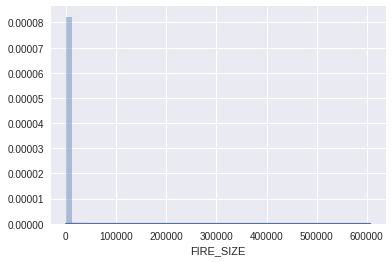

In [0]:
sns.distplot(df['FIRE_SIZE'])

<a name="correlation"></a>
**Let's check the correlation coefficents between features in this dataset. **

In [0]:
df.corr()

,FIRE_YEAR,LATITUDE,LONGITUDE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE,STAT_CAUSE_DESCR_TRANS,YEAR,MONTH,STATE_TRANS
FIRE_YEAR,1.000000,0.000407,0.015863,0.999316,0.116406,0.007048,0.050389,1.000000,-0.007999,0.102115
LATITUDE,0.000407,1.000000,-0.354727,0.005821,0.232035,0.038860,0.012729,0.000407,0.147484,0.152474
LONGITUDE,0.015863,-0.354727,1.000000,0.006870,-0.167023,-0.039731,-0.123879,0.015863,-0.243395,0.207575
DISCOVERY_DATE,0.999316,0.005821,0.006870,1.000000,0.118649,0.007260,0.052475,0.999316,0.028813,0.100746
DISCOVERY_TIME,0.116406,0.232035,-0.167023,0.118649,1.000000,0.019303,-0.029136,0.116406,0.061493,-0.110299
FIRE_SIZE,0.007048,0.038860,-0.039731,0.007260,0.019303,1.000000,0.010450,0.007048,0.005695,-0.008003
STAT_CAUSE_DESCR_TRANS,0.050389,0.012729,-0.123879,0.052475,-0.029136,0.010450,1.000000,0.050389,0.057583,0.036004
YEAR,1.000000,0.000407,0.015863,0.999316,0.116406,0.007048,0.050389,1.000000,-0.007999,0.102115
MONTH,-0.007999,0.147484,-0.243395,0.028813,0.061493,0.005695,0.057583,-0.007999,1.000000,-0.034804
STATE_TRANS,0.102115,0.152474,0.207575,0.100746,-0.110299,-0.008003,0.036004,0.102115,-0.034804,1.000000


<a name="xyarray"></a>
**Next, split up the dataset into an X array that contains the feature to train on " year", and a y array with the target variable "Fire Size".**

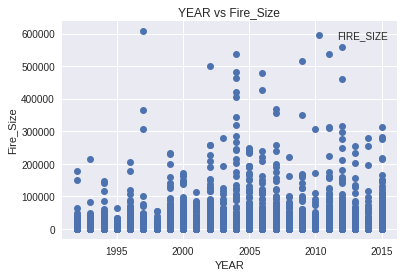

In [0]:
df.plot(x='YEAR', y='FIRE_SIZE', style='o')  
plt.title('YEAR vs Fire_Size')  
plt.xlabel('YEAR')  
plt.ylabel('Fire_Size')  
plt.show()

In [0]:
X = df['YEAR'].values.reshape(-1,1)
y = df['FIRE_SIZE'].values.reshape(-1,1)

<a name="trainingtest"></a>
**Separate training data from test data so that our linear regression model can generalize the data well, avoiding overfitting or underfitting problem **

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

<a name="trainingdata"></a>
**Apply linear rergression model to training dataset **

In [0]:
from sklearn.linear_model import LinearRegression


In [0]:
lm = LinearRegression()
lm.fit(X_train,y_train)
model = lm.fit(X_train,y_train)

<a name="predicttest"></a>
**Predict the target y value in the testing dataset **

In [0]:
predictions = lm.predict(X_test)

In [0]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'predictions': predictions.flatten()})
df1

,Actual,predictions
0,20.00,75.543723
1,15.00,50.564988
2,0.10,85.535217
3,10.00,73.045850
4,5.00,65.552229
5,0.50,53.062862
6,0.50,90.530964
7,0.10,45.569242
8,0.50,95.526711
9,5.00,78.041597


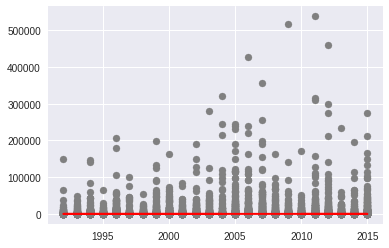

In [0]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, predictions, color='red', linewidth=2)
plt.show()

<a name="lrgraph"></a>
**Graph to visilize the linear regression prediction**

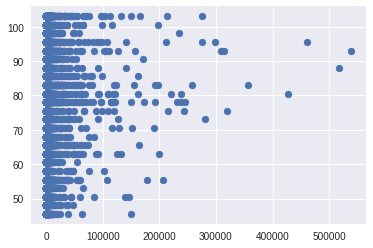

In [0]:
plt.scatter(y_test,predictions)


<a name="testscore"></a>
**Testing data accuracy score**

In [0]:
model.score(X_test, y_test)

6.191646271636042e-05

<a name="trainscore"></a>
**Training data accuracy score**

In [0]:
model.score(X_train,y_train)


4.221064586129586e-05

<a name="crossvalidation"></a>
**5-fold Cross Validation**

In [0]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [0]:
predictions_cv = cross_val_predict(model, X, y, cv=3)

In [0]:
cv_r2_scores_rf = cross_val_score(lm, X, y, cv=5,scoring='r2')

In [0]:
print(cv_r2_scores_rf)

[-1.35915131e-03 -5.04222176e-03 -3.15094910e-03 -7.35027244e-04
 -1.44265363e-05]


In [0]:
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Mean 5-Fold R Squared: -0.0020603551922889984


**Conclusion: accuracy score after cross validation is better than that of linear regression alone. However, Linear Regresion is not a good prediction model for our project given the low accuracy score.**

<a name="weatherdata"></a>

# <FONT color=blue>Introducing weather data<FONT>

__Import global weather data from https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data__

In [0]:
df_global = pd.read_csv("/content/drive/Team Drives/257Machinelearning/GlobalTemperatures.csv")
df_global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


__In order to analyze global weather, we want to plot the land average temperature as time increases__

In [0]:
df_global=df_global[['dt','LandAverageTemperature']]
df_global.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


__Check how many NULL values in the data__

In [0]:
df_global.isna().sum()

dt                         0
LandAverageTemperature    12
dtype: int64

__Check the NULL records__

In [0]:
df_global[df_global.isnull().any(axis=1)]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


__Since all the null records are from very long time ago, and there are only 12 records, the null records can be removed.__

In [0]:
df_global.dropna(inplace=True)

__Change the dt record from string to datatime format__

In [0]:
df_global['dt']=pd.to_datetime(df_global.dt).dt.strftime('%d/%m/%Y')

df_global.head()

,dt,LandAverageTemperature
0,01/01/1750,3.034
1,01/02/1750,3.083
2,01/03/1750,5.626
3,01/04/1750,8.490
4,01/05/1750,11.573


__Next we want to plot data based on year, all the records will be grouped by year with year mean value__

In [0]:
df_global['dt']=df_global['dt'].apply(lambda x:x[6:])
df_global=df_global.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()
df_global.head()

,dt,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333


__Let's plot what's the trend for global land average temperature by year__

Text(0, 0.5, 'Land Average Temperature')

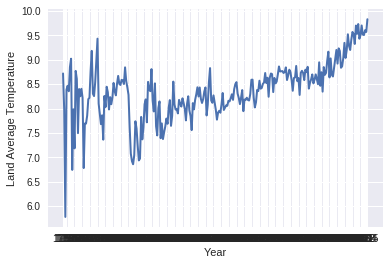

In [0]:
plt.plot(df_global['dt'], df_global['LandAverageTemperature'],linewidth=2.0)
plt.xlabel("Year")
plt.ylabel("Land Average Temperature")

<a name="weatherbycountry"></a>
__It seems there is global warming trend from the plot, let's see some data by countries__

In [0]:
df_weather = pd.read_csv("/content/drive/Team Drives/257Machinelearning/GlobalLandTemperaturesByState.csv")
df_weather.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


__Let's get the United States weather data dated from 1993 to see whether we have any findings related to US wildfire__

In [0]:
import datetime
date_old = datetime.date(1993, 1, 1)
df_us = df_weather.loc[df_weather['Country'] == "United States"]
df_us['dt'] = pd.to_datetime(df_us['dt'])
df_us = df_us.loc[df_us['dt']>=date_old]
df_us.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
10448,1993-01-01,9.432,0.172,Alabama,United States
10449,1993-02-01,8.046,0.255,Alabama,United States
10450,1993-03-01,11.170,0.176,Alabama,United States
10451,1993-04-01,15.095,0.216,Alabama,United States
10452,1993-05-01,20.869,0.298,Alabama,United States


__Check null values for the records__

In [0]:
df_us.isna().sum()

dt                               0
AverageTemperature               2
AverageTemperatureUncertainty    2
State                            0
Country                          0
dtype: int64

__Let's locate the null value records. Before this, we should reindex the records so we can have correct index to locate the null records__

In [0]:
df_us = df_us.reset_index(drop=True)
df_us.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1993-01-01,9.432,0.172,Alabama,United States
1,1993-02-01,8.046,0.255,Alabama,United States
2,1993-03-01,11.170,0.176,Alabama,United States
3,1993-04-01,15.095,0.216,Alabama,United States
4,1993-05-01,20.869,0.298,Alabama,United States


In [0]:
print(df_us[df_us.isnull().any(axis=1)])

             dt  AverageTemperature  AverageTemperatureUncertainty   State  \
497  2013-09-01                 NaN                            NaN  Alaska   
2987 2013-09-01                 NaN                            NaN  Hawaii   

            Country  
497   United States  
2987  United States  


<a name="2013weatherdata"></a>

__We found 2013-09-01 weather data from other website to enrich our datasets with these values__

In [0]:
# https://www.timeanddate.com/weather/usa/anchorage/historic?month=9&year=2013
df_us.set_value(497,'AverageTemperature',9.444)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1993-01-01,9.432,0.172,Alabama,United States
1,1993-02-01,8.046,0.255,Alabama,United States
2,1993-03-01,11.170,0.176,Alabama,United States
3,1993-04-01,15.095,0.216,Alabama,United States
4,1993-05-01,20.869,0.298,Alabama,United States
5,1993-06-01,25.706,0.101,Alabama,United States
6,1993-07-01,28.241,0.162,Alabama,United States
7,1993-08-01,27.166,0.216,Alabama,United States
8,1993-09-01,23.763,0.228,Alabama,United States
9,1993-10-01,17.260,0.121,Alabama,United States


__Since AverageTemperatureUncertainty feature is not important to our project, we want to make the value same across all the august data points__

In [0]:
df_us.iloc[496,:]

dt                               2013-08-01 00:00:00
AverageTemperature                            11.099
AverageTemperatureUncertainty                  0.376
State                                         Alaska
Country                                United States
Name: 496, dtype: object

In [0]:
df_us.set_value(497,'AverageTemperatureUncertainty',0.376)
df_us.iloc[497,:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


dt                               2013-09-01 00:00:00
AverageTemperature                             9.444
AverageTemperatureUncertainty                  0.376
State                                         Alaska
Country                                United States
Name: 497, dtype: object

__Same process for another null data record__

In [0]:
# https://www.timeanddate.com/weather/usa/honolulu/historic?month=9&year=2013
df_us.set_value(2987,'AverageTemperature',26.667)
df_us.iloc[2987,:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


dt                               2013-09-01 00:00:00
AverageTemperature                            26.667
AverageTemperatureUncertainty                    NaN
State                                         Hawaii
Country                                United States
Name: 2987, dtype: object

In [0]:
df_us.iloc[2986,:]

dt                               2013-08-01 00:00:00
AverageTemperature                            24.601
AverageTemperatureUncertainty                   0.38
State                                         Hawaii
Country                                United States
Name: 2986, dtype: object

In [0]:
df_us.set_value(2987,'AverageTemperatureUncertainty',0.38)
df_us.iloc[2987,:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


dt                               2013-09-01 00:00:00
AverageTemperature                            26.667
AverageTemperatureUncertainty                   0.38
State                                         Hawaii
Country                                United States
Name: 2987, dtype: object

__Let's check how many states in the records__

In [0]:
states = df_us['State'].unique()
print(states)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District Of Columbia' 'Florida'
 'Georgia (State)' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


__Plot states average temperature data by year__

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'The Average Temperature')

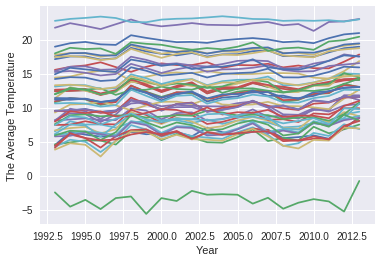

In [0]:
for state in states:
  df_state = df_us.loc[df_us['State'] == state]
  df_state['dt']=pd.DatetimeIndex(df_state['dt']).year
  df_state=df_state.groupby(['dt'])['AverageTemperature'].mean().reset_index()
  plt.plot(df_state['dt'], df_state['AverageTemperature'],label=state)
plt.xlabel("Year")
plt.ylabel("The Average Temperature")

__In order to compare with the US fire cluster chart, we can plot temperature trend within largest wild fire states__ 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'The Average Temperature')

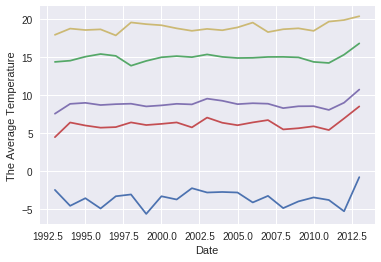

In [0]:
large_fire_states =['Alaska','California','Idaho','Oregon','Texas']
for state_fire in large_fire_states:
  df_state_fire = df_us.loc[df_us['State'] == state_fire]
  df_state_fire['dt']=pd.DatetimeIndex(df_state_fire['dt']).year
  df_state_fire=df_state_fire.groupby(['dt'])['AverageTemperature'].mean().reset_index()
  plt.plot(df_state_fire['dt'], df_state_fire['AverageTemperature'],label=state)
plt.xlabel("Date")
plt.ylabel("The Average Temperature")

__California Statewide Minimum and Maximum Temperatures from 1925 - 2019__

In [0]:
df_ca_max = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/CA-tmax-12-12-1895-2019.csv")
df_ca_max.head()

,Date,Value,Anomaly
0,189512,68.4,-1.8
1,189612,69.3,-0.9
2,189712,68.2,-2.0
3,189812,69.4,-0.8
4,189912,69.0,-1.2


In [0]:
df_ca_max = df_ca_max[['Date','Value']]
df_ca_max.head()

,Date,Value
0,189512,68.4
1,189612,69.3
2,189712,68.2
3,189812,69.4
4,189912,69.0


In [0]:
df_ca_max.isna().sum()

Date     0
Value    0
dtype: int64

Text(0, 0.5, 'Max State Temperature (Fahrenheit)')

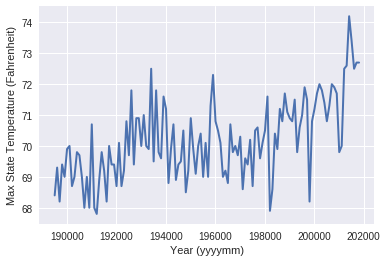

In [0]:
plt.plot(df_ca_max['Date'], df_ca_max['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Max State Temperature (Fahrenheit)")

Text(0, 0.5, 'Max State Temperature (Fahrenheit)')

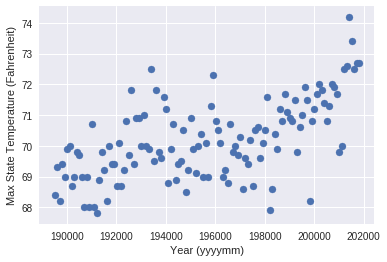

In [0]:
plt.scatter(df_ca_max['Date'], df_ca_max['Value'])
plt.xlabel("Year (yyyymm)")
plt.ylabel("Max State Temperature (Fahrenheit)")

Text(0, 0.5, 'Min State Temperature (Fahrenheit)')

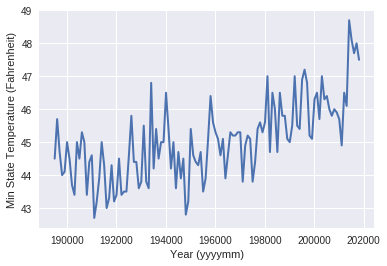

In [0]:
df_ca_min = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/CA-tmin-12-12-1895-2019.csv")
df_ca_min = df_ca_min[['Date','Value']]
plt.plot(df_ca_min['Date'], df_ca_min['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Min State Temperature (Fahrenheit)")

__Alaska Statewide Minimum and Maximum Temperatures from 1925 - 2019__

Text(0, 0.5, 'Min State Temperature (Fahrenheit)')

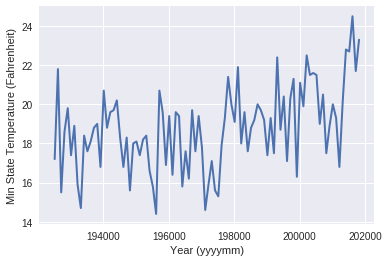

In [0]:
df_al_min = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/AL-tmin-12-12-1925-2019.csv")
df_al_min = df_al_min[['Date','Value']]
plt.plot(df_al_min['Date'], df_al_min['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Min State Temperature (Fahrenheit)")

Text(0, 0.5, 'Max State Temperature (Fahrenheit)')

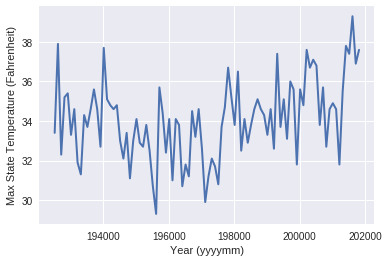

In [0]:
df_al_max = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/AL-tmax-12-12-1925-2019.csv")
df_al_max = df_al_max[['Date','Value']]
plt.plot(df_al_max['Date'], df_al_max['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Max State Temperature (Fahrenheit)")

__Idaho Statewide Minimum and Maximum Temperatures from 1895 - 2019__

Text(0, 0.5, 'Min State Temperature (Fahrenheit)')

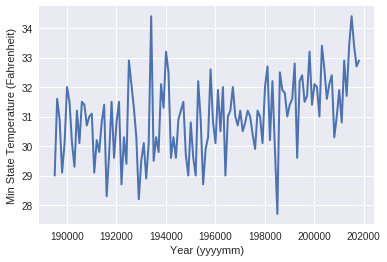

In [0]:
df_id_min = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/ID-tmin-12-12-1895-2019.csv")
df_id_min = df_id_min[['Date','Value']]
plt.plot(df_id_min['Date'], df_id_min['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Min State Temperature (Fahrenheit)")

Text(0, 0.5, 'Max State Temperature (Fahrenheit)')

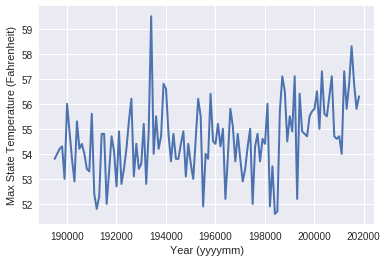

In [0]:
df_id_max = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/ID-tmax-12-12-1895-2019.csv")
df_id_max = df_id_max[['Date','Value']]
plt.plot(df_id_max['Date'], df_id_max['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Max State Temperature (Fahrenheit)")

__Oregon Statewide Minimum and Maximum Temperatures from 1895 - 2019__

Text(0, 0.5, 'Min State Temperature (Fahrenheit)')

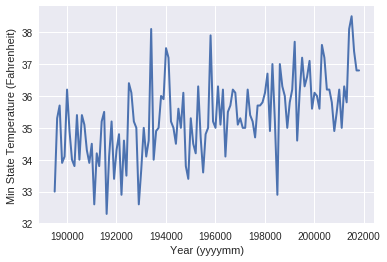

In [0]:
df_or_min = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/OR-tmin-12-12-1895-2019.csv")
df_or_min = df_or_min[['Date','Value']]
plt.plot(df_or_min['Date'], df_or_min['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Min State Temperature (Fahrenheit)")

Text(0, 0.5, 'Max State Temperature (Fahrenheit)')

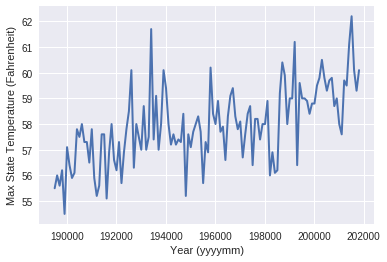

In [0]:
df_or_max = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/OR-tmax-12-12-1895-2019.csv")
df_or_max = df_or_max[['Date','Value']]
plt.plot(df_or_max['Date'], df_or_max['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Max State Temperature (Fahrenheit)")

__Texas Statewide Minimum and Maximum Temperatures from 1895 - 2019__

Text(0, 0.5, 'Min State Temperature (Fahrenheit)')

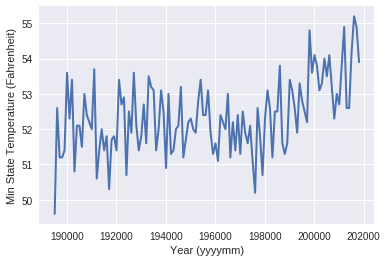

In [0]:
df_tx_min = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/TX-tmin-12-12-1895-2019.csv")
df_tx_min = df_tx_min[['Date','Value']]
plt.plot(df_tx_min['Date'], df_tx_min['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Min State Temperature (Fahrenheit)")

Text(0, 0.5, 'Max State Temperature (Fahrenheit)')

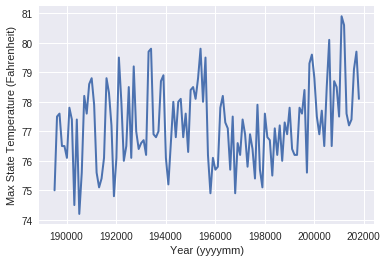

In [0]:
df_tx_max = pd.read_csv("/content/drive/Team Drives/257Machinelearning/us-state-temperatures/TX-tmax-12-12-1895-2019.csv")
df_tx_max = df_tx_max[['Date','Value']]
plt.plot(df_tx_max['Date'], df_tx_max['Value'], linewidth=2.0)
plt.xlabel("Year (yyyymm)")
plt.ylabel("Max State Temperature (Fahrenheit)")

__As you can see, the trend seems to lead to a gradual temperature increase over the years for all of the states shown above.__

__Import CA weather data__

In [0]:
df_ca_temperature = pd.read_csv('/content/drive/Team Drives/257Machinelearning/us-state-temperatures/ca_temperature.csv')
df_ca_temperature.head()

,Date,Value,Anomaly
0,199201,53.1,1.2
1,199202,58.3,2.7
2,199203,60.7,0.7
3,199204,72.0,5.5
4,199205,80.9,6.8


__Get CA fire data for joining__

In [0]:
df_ca = df.loc[df['STATE'] == 'CA']

__Prepare join keys__

In [0]:
df_ca['YEAR_MON']=df_ca['DATE'].apply(lambda x:  100*x.year+x.month )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<a name="joindata"></a>
__Join Temperature data with Fire data__

In [0]:
results = pd.merge(df_ca,df_ca_temperature,left_on ='YEAR_MON',right_on = 'Date',how = 'left')
results.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE,DATE,STAT_CAUSE_DESCR_TRANS,YEAR,MONTH,DAY_OF_WEEK,STATE_TRANS,YEAR_MON,Date,Value,Anomaly
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,1300.0,0.10,2005-02-02,7,2005,2,Wednesday,4,200502,200502.0,56.1,0.5
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,845.0,0.25,2004-05-12,6,2004,5,Wednesday,4,200405,200405.0,77.2,3.1
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,1921.0,0.10,2004-05-31,3,2004,5,Monday,4,200405,200405.0,77.2,3.1
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,1600.0,0.10,2004-06-28,6,2004,6,Monday,4,200406,200406.0,85.2,2.4
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,1600.0,0.10,2004-06-28,6,2004,6,Monday,4,200406,200406.0,85.2,2.4


In [0]:
results.dropna(inplace=True)

**Run linear regression with and without weather data to compare **

In [0]:
from sklearn.model_selection import train_test_split
X = results[['Value','STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE']]
y = results[['STAT_CAUSE_DESCR_TRANS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test, y_test)

0.02241147860257131

In [0]:
X = results[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE']]
y = results[['STAT_CAUSE_DESCR_TRANS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test, y_test)

0.018604275528428804

__The score is higher with the temperature added in, thus temperature might be a latent variable for fire data__

<a name="decisiontree"></a>
# <FONT color=blue>Decision Tree<FONT>

In [0]:
df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE,DATE,STAT_CAUSE_DESCR_TRANS,YEAR,MONTH,DAY_OF_WEEK,STATE_TRANS
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,1300.0,0.10,2005-02-02,7,2005,2,Wednesday,4
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,845.0,0.25,2004-05-12,6,2004,5,Wednesday,4
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,1921.0,0.10,2004-05-31,3,2004,5,Monday,4
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,1600.0,0.10,2004-06-28,6,2004,6,Monday,4
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,1600.0,0.10,2004-06-28,6,2004,6,Monday,4


__Predict fire cause based on key features__

In [0]:
X_DT = df[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE']]
y_DT = df[['STAT_CAUSE_DESCR_TRANS']]

__Training test split and apply Decision Tree Algorithm__

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DT, y_DT, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_DT_train,y_DT_train)
y_pred = clf.predict(X_DT_test)
print("Accuracy:",metrics.accuracy_score(y_DT_test, y_pred))


Accuracy: 0.4890186833055625


__There are too many fire causes. We can try to catergorize them into smaller group to see whether there is any improvement in prediction score__

In [0]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause

In [0]:
df['LABEL']= df['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x))

__Apply decision tree on new categoried label. There is an improvement in model score__





In [0]:
y_DT = df[['LABEL']]
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DT, y_DT, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_DT_train,y_DT_train)
y_pred = clf.predict(X_DT_test)
print("Accuracy:",metrics.accuracy_score(y_DT_test, y_pred))


Accuracy: 0.6182631970787393


<a name="logisticregression"></a>
# <FONT color=blue>Logistic Regression<FONT>

In [0]:
from sklearn.linear_model import LogisticRegression

__Predict the fire cause based on key features, perform the train test split, and apply Logisitic Regression.__

In [0]:
X_LR = df[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE']]
y_LR = df['STAT_CAUSE_DESCR_TRANS']
X_LR_train, X_LR_test, y_LR_train, y_LR_test = train_test_split(X_LR, y_LR, test_size=0.4, random_state=0)
logr = LogisticRegression(solver='liblinear', multi_class='auto')
logr = logr.fit(X_LR_train,y_LR_train)
logr.score(X_LR_test, y_LR_test)

0.3131047373920812

In [0]:
from sklearn.metrics import accuracy_score 
parameters = logr.coef_
intercept = logr.intercept_
print("Parameters:", parameters)
print("Intercept:", intercept)

Parameters: [[-1.10611602e-02 -1.34549339e-05  4.58992781e-04 -4.58602038e-03
   8.39956439e-03  2.86758906e-02]
 [-7.17160832e-03 -4.42520253e-05 -3.29538186e-03  4.91841325e-02
   4.89600317e-02 -1.44784988e-02]
 [-1.00527406e-02 -3.03067338e-03 -1.62836579e-03 -2.71168958e-02
   5.21378912e-02  1.74781482e-02]
 [ 1.58726107e-03 -3.27025340e-04  1.00980379e-03 -6.59393095e-02
  -1.26933054e-02  2.61208480e-02]
 [-7.52384894e-03 -2.05005740e-05 -1.50352257e-03  4.36095519e-02
  -1.95868334e-02 -1.20262019e-02]
 [ 4.46217255e-02 -1.29406856e-04 -6.20497825e-03  5.73710011e-02
   1.22011599e-01 -8.40970034e-03]
 [ 2.41507383e-03  5.09233336e-05 -4.06354859e-03  1.34406704e-01
   3.07401754e-02 -4.27207852e-02]
 [ 4.50784912e-04 -1.63554231e-05 -1.05498735e-03  1.79286082e-02
   2.39650434e-02  4.79598533e-03]
 [ 2.18938904e-02 -2.63909742e-06  2.30371337e-05 -4.58238831e-02
  -1.18787097e-01 -1.61640524e-02]
 [ 4.63575390e-02  3.23240318e-06 -3.71079509e-03  8.20543034e-04
   3.14419028

In [0]:
from sklearn.metrics import classification_report, confusion_matrix 
y_pred = logr.predict(X_LR_test) 
print(confusion_matrix(y_LR_test,y_pred))  
print(classification_report(y_LR_test,y_pred)) 

[[  1792      0      0  90938      0      0  14352   4843    405      0
       0      0      0]
 [   210      0      0  13387      0      0  15846    976     88      0
       0      0      0]
 [   117      0      0  17132      0      0   6116    953     86      0
       0      0      0]
 [  1737      0      0 145274      0      0  18780   3847   2674      0
       0      0      0]
 [   286      0      0  33107      0      0  22876   1866    928      0
       0      0      0]
 [     1      0      0   1246      0      0   2182   1093     10      0
       0      0      0]
 [   107      0      0  25576      0      0  83112   1788    534      0
       0      0      0]
 [   956      0      0  83088      0      0  38583   3832   2856      0
       0      0      0]
 [   196      0      0  44731      0      0  19564    715   1503      0
       0      0      0]
 [    10      0      0   3751      0      0   1526    213    173      0
       0      0      0]
 [    60      0      0  11630      0    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.32      0.02      0.03    112330
           1       0.00      0.00      0.00     30507
           2       0.00      0.00      0.00     24404
           3       0.30      0.84      0.44    172312
           4       0.00      0.00      0.00     59063
           5       0.00      0.00      0.00      4532
           6       0.36      0.75      0.49    111117
           7       0.18      0.03      0.05    129315
           8       0.16      0.02      0.04     66709
           9       0.00      0.00      0.00      5673
          10       0.00      0.00      0.00     13431
          11       0.00      0.00      0.00     21228
          12       0.00      0.00      0.00      1565

   micro avg       0.31      0.31      0.31    752186
   macro avg       0.10      0.13      0.08    752186
weighted avg       0.21      0.31      0.19    752186



__The score for logisitic regression is significantly better than the score for linear regression. However, the decision tree score was still better than the logisitic regression score. This means that the decision tree algorithm is better suited.__

<a name="randomforest"></a>
# <FONT color=blue>Random Forest<FONT>

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_RF = df[['STATE_TRANS','YEAR','MONTH','LATITUDE','LONGITUDE']]
y_RF = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_RF,y_RF,test_size=0.3, random_state=0)
clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.6954727549898961


<a name="naivebayes"></a>
# <FONT color=blue>Naive Bayes<FONT>

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X_NB = df[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE']]
y_NB = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_NB,y_NB,test_size=0.3, random_state=0)

clf = GaussianNB()
clf.fit(X_train, y_train)
target_pred = clf.predict(X_test)
accuracy_score(y_test, target_pred, normalize = True)

0.4654004325167512

<a name="adaboost"></a>
# <FONT color=blue>Adaboost<FONT>

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
X_ADA = df[['STATE_TRANS','YEAR','MONTH','LATITUDE','LONGITUDE']]
y_ADA = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_RF,y_RF,test_size=0.3, random_state=0)
clf = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5362321409579183


<a name="beatifulsoup"></a>
# <FONT color=blue>Beatiful Soup<FONT>

In [0]:
!pip3 install beautifulsoup4

In [0]:
from urllib.request import urlopen


In [0]:
from bs4 import BeautifulSoup

In [0]:
html2 = urlopen("https://www.timeanddate.com/weather/usa/anchorage/historic?month=9&year=2013")

In [0]:
soup2 = BeautifulSoup(html2, 'html.parser')
print(soup2.prettify())

<!DOCTYPE html>
<!--
scripts and programs that download content transparent to the user are not allowed without permission
-->
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Weather in September 2013 in Anchorage, Alaska, USA
  </title>
  <meta content="Weather reports from September 2013 in Anchorage, Alaska, USA with highs and lows" name="description"/>
  <meta content="past, historic, recent, wether, weather, temp, temps, temperature, celcius, celsius, fahrenheit, sunny, sun, clouds, cloudes, cloudy, windy, forecasts, forecast, met, meterology, metrology, Anchorage, Alaska, USA, PALH, Alaska, September, 2013, ak" name="keywords"/>
  <meta content="https://www.timeanddate.com/scripts/cityog.php?title=Past%20Weather%20in&amp;tint=0x007b7a&amp;city=Anchorage&amp;state=Alaska&amp;country=USA&amp;image=anchorage1" property="og:image"/>
  <meta content="1366" property="og:image:width"/>
  <meta content="738" property="og:image:

In [0]:
main_content2 = soup2.find(class_="main-content-div")
weatherSummary_items2 = main_content2.find_all(class_="eight columns")
weatherDetails2 = weatherSummary_items2[0]
  

In [0]:
print(weatherDetails2.prettify())

<div class="eight columns">
 <h2>
  High &amp; Low Weather Summary for September 2013
 </h2>
 <table class="zebra tb-wt fw tb-hover">
  <thead>
   <tr>
    <th>
    </th>
    <th class="sep">
     Temperature
    </th>
    <th class="sep">
     Humidity
    </th>
    <th class="sep">
     Pressure
    </th>
   </tr>
  </thead>
  <tbody>
   <tr class="c0">
    <th>
     High
    </th>
    <td>
     65 °F
     <span class="small">
      (Sep 3, 12:53 pm)
     </span>
    </td>
    <td class="sep">
     97%
     <span class="small">
      (Sep 14, 6:53 am)
     </span>
    </td>
    <td class="sep">
     30.03 "Hg
     <span class="small">
      (Sep 14, 6:53 am)
     </span>
    </td>
   </tr>
   <tr class="c1">
    <th>
     Low
    </th>
    <td>
     30 °F
     <span class="small">
      (Sep 24, 7:53 am)
     </span>
    </td>
    <td class="sep">
     36%
     <span class="small">
      (Sep 20, 3:53 pm)
     </span>
    </td>
    <td class="sep">
     28.95 "Hg
     <span class="sm

In [0]:
lowWeather2 = weatherDetails2.find(class_="c1").get_text()
print(lowWeather2)

Low30 °F (Sep 24, 7:53 am)36% (Sep 20, 3:53 pm)28.95 "Hg (Sep 21, 10:53 pm)


In [0]:
period_tags2 = main_content2.select(".c1 .sep")
tempHumPre2 = [pt.get_text() for pt in period_tags2]
tempHumPre2


['36% (Sep 20, 3:53 pm)',
 '28.95 "Hg (Sep 21, 10:53 pm)',
 '3 mph',
 '29.85 "Hg',
 'No wind',
 '29.85 "Hg',
 '5 mph',
 '29.85 "Hg',
 '3 mph',
 '29.83 "Hg',
 '3 mph',
 '29.83 "Hg',
 'No wind',
 '29.83 "Hg',
 '5 mph',
 '29.83 "Hg',
 '3 mph',
 '29.81 "Hg',
 '5 mph',
 '29.78 "Hg',
 '7 mph',
 '29.75 "Hg',
 '5 mph',
 '29.74 "Hg',
 '5 mph',
 '29.72 "Hg']

**We will extract September month's temperature, humidity, and pressure from all the webpages from 2009 to 2018.**

In [0]:
years_url = [str(i) for i in range(2009,2018)]

In [0]:
for year_url in years_url:
  html = urlopen("https://www.timeanddate.com/weather/usa/anchorage/historic?month=9&year="+ year_url)
  soup = BeautifulSoup(html, 'html.parser')
  main_content = soup.find(class_="main-content-div")
  weatherSummary_items = main_content.find_all(class_="eight columns")
  weatherDetails = weatherSummary_items[0]
  lowWeather = weatherDetails.find(class_="c1").get_text()
  period_tags = main_content.select(".c1 .sep")
  tempHumPre = [pt.get_text() for pt in period_tags]
  

In [0]:
tempHumPre

['43% (Sep 30, 12:53 pm)',
 '29.23 "Hg (Sep 5, 10:53 pm)',
 '10 mph',
 '29.55 "Hg',
 '3 mph',
 '29.56 "Hg',
 '5 mph',
 '29.58 "Hg',
 '6 mph',
 '29.59 "Hg',
 '5 mph',
 '29.61 "Hg',
 '9 mph',
 '29.64 "Hg',
 '12 mph',
 '29.68 "Hg',
 '17 mph',
 '29.71 "Hg',
 '9 mph',
 '29.72 "Hg',
 '10 mph',
 '29.77 "Hg',
 '5 mph',
 '29.78 "Hg',
 '7 mph',
 '29.80 "Hg',
 '8 mph',
 '29.82 "Hg']

In [0]:
import pandas as pd
weather = pd.DataFrame({
        "highWeather": tempHumPre
         
    })
tempHumPre

['43% (Sep 30, 12:53 pm)',
 '29.23 "Hg (Sep 5, 10:53 pm)',
 '10 mph',
 '29.55 "Hg',
 '3 mph',
 '29.56 "Hg',
 '5 mph',
 '29.58 "Hg',
 '6 mph',
 '29.59 "Hg',
 '5 mph',
 '29.61 "Hg',
 '9 mph',
 '29.64 "Hg',
 '12 mph',
 '29.68 "Hg',
 '17 mph',
 '29.71 "Hg',
 '9 mph',
 '29.72 "Hg',
 '10 mph',
 '29.77 "Hg',
 '5 mph',
 '29.78 "Hg',
 '7 mph',
 '29.80 "Hg',
 '8 mph',
 '29.82 "Hg']

<a name="dataenrichment"></a>
# <FONT color=blue>Data enrichment: adding max temp,min temp,precipitation features <FONT>

In [0]:
df["STATE"].unique()

array(['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI'], dtype=object)

In [0]:
dfmax = pd.read_csv("/content/drive/Team Drives/257Machinelearning/weather/allstatesmax.csv")
dfmax.head()
dfmax = dfmax[["STATE","MONTHYEAR","HIGHTEMP"]]
dfmax.head()

,STATE,MONTHYEAR,HIGHTEMP
0,AL,199201,54.3
1,AL,199202,63.5
2,AL,199203,67.8
3,AL,199204,74.5
4,AL,199205,81.0


In [0]:
dfmin = pd.read_csv("/content/drive/Team Drives/257Machinelearning/weather/allstatesmin.csv")
dfmin.head()

,Unnamed: 0,Anomaly,MIN,MONTHYEAR,STATE
0,0,-0.3,33.9,199201,AL
1,1,2.9,39.3,199202,AL
2,2,-0.9,42.0,199203,AL
3,3,-1.6,48.5,199204,AL
4,4,-3.3,55.0,199205,AL


In [0]:
dfmin = dfmin[["STATE","MONTHYEAR","MIN"]]
dfmin.head()

,STATE,MONTHYEAR,MIN
0,AL,199201,33.9
1,AL,199202,39.3
2,AL,199203,42.0
3,AL,199204,48.5
4,AL,199205,55.0


In [0]:
dfprep = pd.read_csv("/content/drive/Team Drives/257Machinelearning/weather/allstatesprep.csv")
dfprep.head()

,Unnamed: 0,Anomaly,MONTHYEAR,PREP,STATE
0,0,0.94,199201,6.12,AL
1,1,0.81,199202,5.99,AL
2,2,-2.13,199203,4.03,AL
3,3,-1.90,199204,2.91,AL
4,4,-2.29,199205,1.95,AL


In [0]:
dfprep = dfprep[["STATE","MONTHYEAR","PREP"]]
dfprep.head()

,STATE,MONTHYEAR,PREP
0,AL,199201,6.12
1,AL,199202,5.99
2,AL,199203,4.03
3,AL,199204,2.91
4,AL,199205,1.95


In [0]:
dfmaxmin = pd.merge(dfmax, dfmin,  how='left', left_on=["STATE","MONTHYEAR"], right_on = ["STATE","MONTHYEAR"])
dfmaxmin.head()

,STATE,MONTHYEAR,HIGHTEMP,MIN
0,AL,199201,54.3,33.9
1,AL,199202,63.5,39.3
2,AL,199203,67.8,42.0
3,AL,199204,74.5,48.5
4,AL,199205,81.0,55.0


In [0]:
dfweatherall = pd.merge(dfmaxmin, dfprep,  how='left', left_on=["STATE","MONTHYEAR"], right_on = ["STATE","MONTHYEAR"])


In [0]:
dfweatherall[dfweatherall.isnull().any(axis=1)]
dfweatherall.dropna(inplace=True)

In [0]:
dfweatherall.shape

(14161, 5)

In [0]:
df['YEAR_MON']=df['DATE'].apply(lambda x:  100*x.year+x.month )
df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE,DATE,STAT_CAUSE_DESCR_TRANS,YEAR,MONTH,DAY_OF_WEEK,STATE_TRANS,LABEL,YEAR_MON
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,1300.0,0.10,2005-02-02,7,2005,2,Wednesday,4,4,200502
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,845.0,0.25,2004-05-12,6,2004,5,Wednesday,4,1,200405
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,1921.0,0.10,2004-05-31,3,2004,5,Monday,4,2,200405
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,1600.0,0.10,2004-06-28,6,2004,6,Monday,4,1,200406
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,1600.0,0.10,2004-06-28,6,2004,6,Monday,4,1,200406


In [0]:
df_fire_weather = pd.merge(df,dfweatherall,left_on =['STATE','YEAR_MON'],right_on = ['STATE','MONTHYEAR'],how = 'left')
df_fire_weather.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE,DATE,STAT_CAUSE_DESCR_TRANS,YEAR,MONTH,DAY_OF_WEEK,STATE_TRANS,LABEL,YEAR_MON,MONTHYEAR,HIGHTEMP,MIN,PREP
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,1300.0,0.10,2005-02-02,7,2005,2,Wednesday,4,4,200502,200502.0,56.1,38.1,4.03
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,845.0,0.25,2004-05-12,6,2004,5,Wednesday,4,1,200405,200405.0,77.2,49.2,0.45
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,1921.0,0.10,2004-05-31,3,2004,5,Monday,4,2,200405,200405.0,77.2,49.2,0.45
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,1600.0,0.10,2004-06-28,6,2004,6,Monday,4,1,200406,200406.0,85.2,55.6,0.08
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,1600.0,0.10,2004-06-28,6,2004,6,Monday,4,1,200406,200406.0,85.2,55.6,0.08


In [0]:
df_fire_weather.shape
df_fire_weather[df_fire_weather.isnull().any(axis=1)]

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE,DATE,STAT_CAUSE_DESCR_TRANS,YEAR,MONTH,DAY_OF_WEEK,STATE_TRANS,LABEL,YEAR_MON,MONTHYEAR,HIGHTEMP,MIN,PREP
242167,1999,Miscellaneous,38.886690,-76.945100,DC,2451337.5,1500.0,0.10,1999-06-08,7,1999,6,Tuesday,7,4,199906,NaN,NaN,NaN,NaN
242168,1999,Miscellaneous,38.911930,-76.942739,DC,2451374.5,2130.0,0.10,1999-07-15,7,1999,7,Thursday,7,4,199907,NaN,NaN,NaN,NaN
242169,1999,Miscellaneous,38.886700,-76.945310,DC,2451393.5,1300.0,0.10,1999-08-03,7,1999,8,Tuesday,7,4,199908,NaN,NaN,NaN,NaN
242170,1999,Miscellaneous,38.862600,-76.985910,DC,2451407.5,1530.0,0.10,1999-08-17,7,1999,8,Tuesday,7,4,199908,NaN,NaN,NaN,NaN
242172,1992,Arson,38.938320,-77.037400,DC,2448663.5,1605.0,0.20,1992-02-11,0,1992,2,Tuesday,7,3,199202,NaN,NaN,NaN,NaN
242173,1992,Arson,38.959160,-77.014340,DC,2448824.5,900.0,0.10,1992-07-21,0,1992,7,Tuesday,7,3,199207,NaN,NaN,NaN,NaN
242174,1993,Arson,38.948370,-77.004840,DC,2449023.5,1156.0,0.30,1993-02-05,0,1993,2,Friday,7,3,199302,NaN,NaN,NaN,NaN
242175,1993,Arson,38.935870,-76.988370,DC,2449023.5,1400.0,0.70,1993-02-05,0,1993,2,Friday,7,3,199302,NaN,NaN,NaN,NaN
242176,1993,Arson,38.933300,-77.050000,DC,2449109.5,-500.0,1.00,1993-05-02,0,1993,5,Sunday,7,3,199305,NaN,NaN,NaN,NaN
242177,1993,Arson,38.933300,-77.050000,DC,2449109.5,-500.0,4.00,1993-05-02,0,1993,5,Sunday,7,3,199305,NaN,NaN,NaN,NaN


In [0]:
df_fire_weather[df_fire_weather.isnull().any(axis=1)]
df_fire_weather.dropna(inplace=True)
df_fire_weather.shape

(1848423, 20)

#<FONT color=blue>K-Means<FONT color=black>

**With our newly enriched datasets, we once again apply K-means using the newly added features such as precipitation, maximum temperature, and minimum temperature to see how these new features affect fires.**

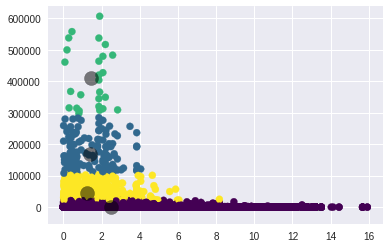

In [0]:
X_kmeans_1=df_fire_weather[['PREP','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_kmeans_1)
y_kmeans_1 = kmeans.predict(X_kmeans_1)
plt.scatter(X_kmeans_1[:, 0], X_kmeans_1[:, 1], c=y_kmeans_1, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**As shown in the graph above, we can see that when the precipitation is lower, the size of the fire is much larger.**

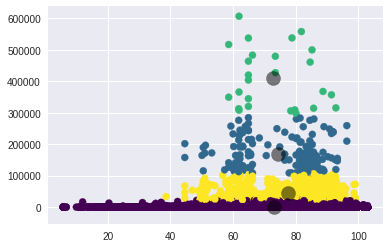

In [0]:
X_kmeans_2=df_fire_weather[['HIGHTEMP','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_kmeans_2)
y_kmeans_2 = kmeans.predict(X_kmeans_2)
plt.scatter(X_kmeans_2[:, 0], X_kmeans_2[:, 1], c=y_kmeans_2, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**As shown in the graph above, we can see that when the max temperature is higher, the size of the fire is much larger.**

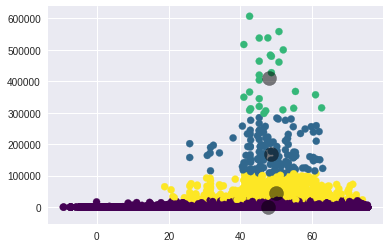

In [0]:
X_kmeans_3=df_fire_weather[['MIN','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_kmeans_3)
y_kmeans_3 = kmeans.predict(X_kmeans_3)
plt.scatter(X_kmeans_3[:, 0], X_kmeans_3[:, 1], c=y_kmeans_3, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**Simiar to the max temperature graph, we can see that when the min temperature is higher, the size of the fire is much larger.**

**Based on the graphs shown above, we can definitely see a noticeable correlation between the (precipitation, max temperature, and min temperature) and the (fire size).**

#<FONT color=blue>GMM<FONT color=black>

**We also once again apply GMM to our newly enriched data to see how it compares with K-means.**

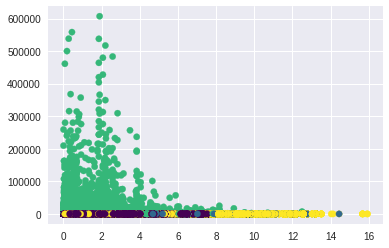

In [0]:
gmm_fire_weather = GaussianMixture(n_components=4).fit(X_kmeans_1)
gmm_fire_weather_labels = gmm_fire_weather.predict(X_kmeans_1)
plt.scatter(X_kmeans_1[:, 0], X_kmeans_1[:, 1], c=gmm_fire_weather_labels, s=40, cmap='viridis')

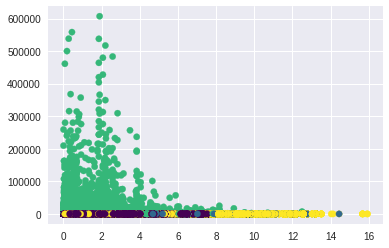

In [0]:
gmm_full_fire_weather = GaussianMixture(n_components=4,covariance_type='full').fit(X_kmeans_1)
gmm_labels_full_fire_weather = gmm_full_fire_weather.predict(X_kmeans_1)
plt.scatter(X_kmeans_1[:, 0], X_kmeans_1[:, 1], c=gmm_labels_full_fire_weather, s=40, cmap='viridis')

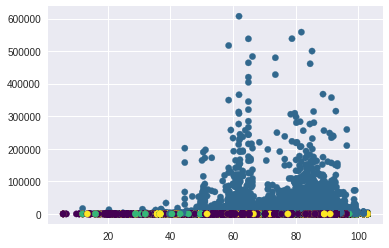

In [0]:
gmm_fire_weather_2 = GaussianMixture(n_components=4).fit(X_kmeans_2)
gmm_fire_weather_labels_2 = gmm_fire_weather_2.predict(X_kmeans_2)
plt.scatter(X_kmeans_2[:, 0], X_kmeans_2[:, 1], c=gmm_fire_weather_labels_2, s=40, cmap='viridis')

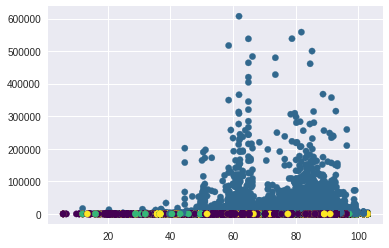

In [0]:
gmm_full_fire_weather_2 = GaussianMixture(n_components=4,covariance_type='full').fit(X_kmeans_2)
gmm_labels_full_fire_weather_2 = gmm_full_fire_weather_2.predict(X_kmeans_2)
plt.scatter(X_kmeans_2[:, 0], X_kmeans_2[:, 1], c=gmm_labels_full_fire_weather_2, s=40, cmap='viridis')

**Overall, K-means still appears to be better than GMM for our datasets, especially with the grouping of the points.**

#<FONT color=blue>Linear Regression<FONT color=black>

**Before we apply linear regression on our newly enriched data, we took a look at some of the new features that were added.**

In [0]:
for i in df['STAT_CAUSE_DESCR_TRANS'].unique():
    print(str(i)+" is reperesenting "+df[df['STAT_CAUSE_DESCR_TRANS']==i]['STAT_CAUSE_DESCR'].unique())

['7 is reperesenting Miscellaneous']
['6 is reperesenting Lightning']
['3 is reperesenting Debris Burning']
['1 is reperesenting Campfire']
['4 is reperesenting Equipment Use']
['0 is reperesenting Arson']
['2 is reperesenting Children']
['10 is reperesenting Railroad']
['11 is reperesenting Smoking']
['9 is reperesenting Powerline']
['12 is reperesenting Structure']
['5 is reperesenting Fireworks']
['8 is reperesenting Missing/Undefined']


Text(0, 0.5, 'Fire Causes')

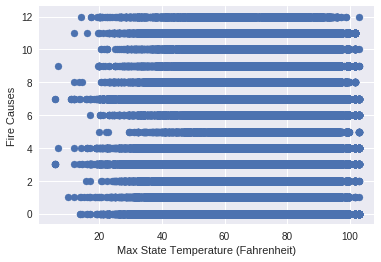

In [0]:
plt.scatter(df_fire_weather['HIGHTEMP'], df_fire_weather['STAT_CAUSE_DESCR_TRANS'])
plt.xlabel("Max State Temperature (Fahrenheit)")
plt.ylabel("Fire Causes")

**As you can see above, it showed that when the max temperature was lower, there were less occurances of certain fire causes. For example, when the max temperature was below 80 degrees Fahrenheit, the occurances of fires caused by fireworks (Cause #5) were much lower. You can tell by the larger gaps between the points.**

Text(0, 0.5, 'Fire Causes')

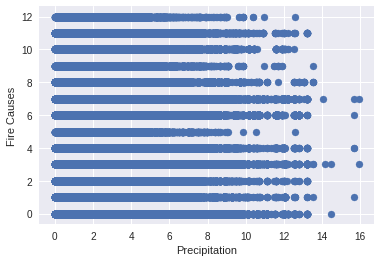

In [0]:
plt.scatter(df_fire_weather['PREP'], df_fire_weather['STAT_CAUSE_DESCR_TRANS'])
plt.xlabel("Precipitation")
plt.ylabel("Fire Causes")

**As you can see above, it showed that when the precipitation was higher, there were less occurances of certain fire causes. For example, when the precipitation was above 4, the occurances of fires caused by fireworks (Cause #5) were much lower. You can tell since there were little to no data points shown for fires caused fireworks (Cause #5) on the graph when the precipitation was greater than 12.**

In [0]:
X_LIN_ALL = df_fire_weather[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE','PREP','MIN','HIGHTEMP']]
y_LIN_ALL = df_fire_weather['LABEL']
X_LIN_ALL_train, X_LIN_ALL_test, y_LIN_ALL_train, y_LIN_ALL_test = train_test_split(X_LIN_ALL, y_LIN_ALL, test_size=0.4, random_state=0)
linr = LinearRegression()
linr.fit(X_LIN_ALL_train,y_LIN_ALL_train)
linr.score(X_LIN_ALL_test, y_LIN_ALL_test)

0.0624181164592309

In [0]:
X_LIN_ALL = df_fire_weather[['STATE_TRANS','LATITUDE','LONGITUDE','YEAR','MONTH','STAT_CAUSE_DESCR_TRANS','PREP','MIN','HIGHTEMP']]
y_LIN_ALL = df_fire_weather['LABEL']
X_LIN_ALL_train, X_LIN_ALL_test, y_LIN_ALL_train, y_LIN_ALL_test = train_test_split(X_LIN_ALL, y_LIN_ALL, test_size=0.4, random_state=0)
linr = LinearRegression()
linr.fit(X_LIN_ALL_train,y_LIN_ALL_train)
linr.score(X_LIN_ALL_test, y_LIN_ALL_test)

0.1036498358225888

**After applying linear regression on our newly enriched data, the accuracy score increased by ten folds. Basically, it increased from about 1 percent to slightly over 10 percent. However, even with this significant increase, the accuracy score is still very low.**

#<FONT color=blue>**Logistic Regression**: 
  <FONT color=black>**We apply this model to enriched datasets. Comparing with the earlier logistic regression model, we are using three additional "maximum temperature, minimum temperature, and precipitation" features as predictor. **




In [0]:
X_LRALL = df_fire_weather[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE','PREP','MIN','HIGHTEMP']]
y_LRALL = df_fire_weather['LABEL']
X_LRALL_train, X_LRALL_test, y_LRALL_train, y_LRALL_test = train_test_split(X_LRALL, y_LRALL, test_size=0.4, random_state=0)
logr = LogisticRegression(solver='liblinear', multi_class='auto')
logr.fit(X_LRALL_train,y_LRALL_train)
logr.score(X_LRALL_test, y_LRALL_test)

0.4906771981551862

In [0]:
from sklearn.metrics import accuracy_score 
parameters = logr.coef_
intercept = logr.intercept_
print("Parameters:", parameters)
print("Intercept:", intercept)

Parameters: [[ 5.02182333e-03  3.69577680e-05 -1.15755888e-02  7.08934271e-02
   9.82502142e-02 -4.18419691e-02  4.49171663e-01 -1.69302231e-01
   2.62639266e-01]
 [-7.81872074e-04 -6.62274854e-05  1.83070874e-03 -2.19477664e-02
  -3.21148596e-02  5.94669735e-03 -4.85762560e-02  3.51563783e-02
  -4.81513881e-02]
 [-8.60935178e-03 -6.29428802e-06  1.07404544e-03  8.93095217e-03
  -2.21775943e-02  2.02998599e-02  4.65346554e-02 -2.33701328e-03
  -1.43641591e-02]
 [ 4.93440640e-03 -1.09941263e-05  3.18425775e-04  3.22416707e-03
  -3.23604574e-03  1.57544670e-03 -1.14416987e-01  3.85429902e-02
  -4.33115743e-02]]
Intercept: [ 0.00016382  0.00016773  0.00043239 -0.00086495]


#<FONT color=blue>Adaboost: <FONT color=black>
**We apply this model to enriched datasets. Comparing with the earlier model run, we are using three additional "maximum temperature, minimum temperature, and precipitation" features as predictor.** 

In [0]:
X_ADAALL1 = df_fire_weather[['STATE_TRANS','YEAR','MONTH','LATITUDE','LONGITUDE','PREP']]
y_ADAALL1 = df_fire_weather['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_ADAALL1,y_ADAALL1,test_size=0.3, random_state=0)
clf = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5276713307016611


In [0]:
X_ADAALL2 = df_fire_weather[['STATE_TRANS','YEAR','MONTH','LATITUDE','LONGITUDE']]
y_ADAALL2 = df_fire_weather['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_ADAALL2,y_ADAALL2,test_size=0.3, random_state=0)
clf = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5337053019961157


In [0]:
X_ADAALL3 = df_fire_weather[['STATE_TRANS','YEAR','MONTH','LATITUDE','LONGITUDE','PREP','MIN','HIGHTEMP']]
y_ADAALL3 = df_fire_weather['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_ADAALL3,y_ADAALL3,test_size=0.3, random_state=0)
clf = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5312166945883608


#<FONT color=blue>Random Forest: <FONT color=black>
**We apply this model to enriched datasets. Comparing with the earlier Adaboost model, we are using three additional "maximum temperature, minimum temperature, and precipitation" features as predictor. ** 

In [0]:
X_RFALL1 = df_fire_weather[['STATE_TRANS','YEAR','MONTH','LATITUDE','LONGITUDE','PREP']]
y_RFALL1 = df_fire_weather['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_RFALL1,y_RFALL1,test_size=0.3, random_state=0)
clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.6804537921507879


In [0]:
X_RFALL2 = df_fire_weather[['STATE_TRANS','YEAR','MONTH','LATITUDE','LONGITUDE']]
y_RFALL2 = df_fire_weather['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_RFALL2,y_RFALL2,test_size=0.3, random_state=0)
clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.6895480292213003


In [0]:
X_RFALL3 = df_fire_weather[['STATE_TRANS','YEAR','MONTH','LATITUDE','LONGITUDE','PREP','MIN','HIGHTEMP']]
y_RFALL3 = df_fire_weather['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_RFALL3,y_RFALL3,test_size=0.3, random_state=0)
clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.6703641121171737


#<FONT color=blue>Naive Bayes: <FONT color=black>
**We apply this model to enriched datasets. First, we use the same features as predictor. Afterwards, we are using three additional "maximum temperature, minimum temperature, and precipitation" features as predictor.  ** 

In [0]:
X_NBALL1 = df_fire_weather[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE']]
y_NBALL1 = df_fire_weather['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_NBALL1,y_NBALL1,test_size=0.3, random_state=0)

clf = GaussianNB()
clf.fit(X_train, y_train)
target_pred = clf.predict(X_test)
accuracy_score(y_test, target_pred, normalize = True)

0.45927971045593813

In [0]:
X_NBALL2 = df_fire_weather[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE','PREP','MIN','HIGHTEMP']]
y_NBALL2 = df_fire_weather['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_NBALL2,y_NBALL2,test_size=0.3, random_state=0)

clf = GaussianNB()
clf.fit(X_train, y_train)
target_pred = clf.predict(X_test)
accuracy_score(y_test, target_pred, normalize = True)

0.47439890212739866

#<FONT color=blue>Decision Tree: <FONT color=black>
**We apply this model to enriched datasets, using three additional "maximum temperature, minimum temperature, and precipitation" features as predictor.  ** 

In [0]:
X_DTALL = df_fire_weather[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE']]
y_DTALL = df_fire_weather[['LABEL']]
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DTALL, y_DTALL, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_DT_train,y_DT_train)
y_pred = clf.predict(X_DT_test)
print("Accuracy:",metrics.accuracy_score(y_DT_test, y_pred))

Accuracy: 0.6113534597954653


In [0]:
X_DTALL2 = df_fire_weather[['STATE_TRANS','FIRE_SIZE','YEAR','MONTH','LATITUDE','LONGITUDE','PREP','MIN','HIGHTEMP']]
y_DTALL2 = df_fire_weather[['LABEL']]
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DTALL2, y_DTALL2, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_DT_train,y_DT_train)
y_pred = clf.predict(X_DT_test)
print("Accuracy:",metrics.accuracy_score(y_DT_test, y_pred))

Accuracy: 0.6120495485341562


| Accuracy Score | Single Dataset | Enriched Dataset |
| --- | --- | --- |
| Decision Tree | 61.8% | 61.2% |
| Logistic Regression | 31.3% | 49% |
| Random Forest | 69.5% | 66.9% |
| Naive Bayes | 46.5% | 47.4% |
| Adaboost | 53.6% |53.2% |
| Linear Regression | <1% |10% |
---



#<FONT color=blue>Conclusion: 
**After data enrichment, we got new insight from data amalgamation, which is, extremely large wildfire will mostly like to happen if both the max and min temperature are higher than usual and the prescription is lower than usual. According to global land average temperature trends and the United States max/min temperature trends, it’s not surprising that we have so many extreme wildfires in recent years globally.**